In [1]:
import collections
import numpy as np
import pandas as pd
import platform
import seaborn as sns
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib import rc
from gensim.models import Word2Vec


In [9]:
eff = ['기력','순환','회복', '정화']
actions = ['명상', '운동', '산책', '수면', '독서', '영화', '취미', '요리', '여행', '식사', '목욕','쇼핑', '등산']

In [3]:
if platform.system() == 'Windows':
    font = 'Malgun Gothic'
else:
    font = 'NanumGothic'

wiki_model = Word2Vec.load('./ko/ko.bin')


C:\Users\fd\anaconda3\lib\site-packages\gensim\models\base_any2vec.py:742: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  warnings.warn(


C:\Users\fd\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\fd\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


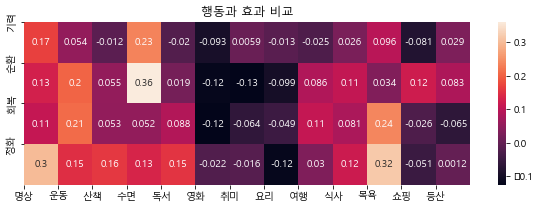

In [11]:
plt.rc('font', family=font)
result = []

for out_word in eff:
    sub_result = []
    for in_word in actions:
        try:
            sub_result.append(wiki_model.wv.similarity(out_word, in_word))
        except:
            sub_result.append(0)
    result.append(sub_result)

fig = plt.figure(figsize=(10,3))
fig.set_facecolor('white')
plt.title(f'행동과 효과 비교')
sns.heatmap(result,annot=True)
plt.xticks(np.arange(len(actions)),actions)
plt.yticks(np.arange(len(eff)),eff)
plt.show()


In [29]:
effs = ['에너지','순환','회복', '정화']

def result(action):    
    ret = []
    for eff in effs:
        ret.append(wiki_model.wv.similarity(eff,action))
    return ret


def show(ret,act):
    plt.rc('font', family=font)

    plt.figure()
    plt.bar(np.arange(len(ret)),ret)
    plt.title(f'{act}의 효능 차원 매칭')
    plt.xticks(np.arange(len(effs)), effs)
    plt.yticks(np.arange(0,1.2,0.2))
    plt.show()


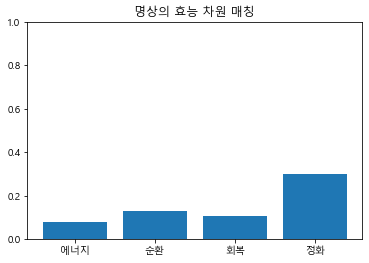

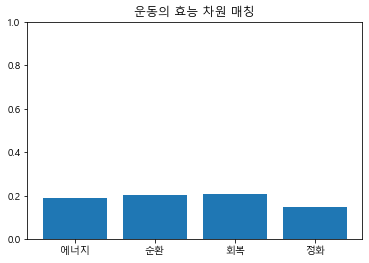

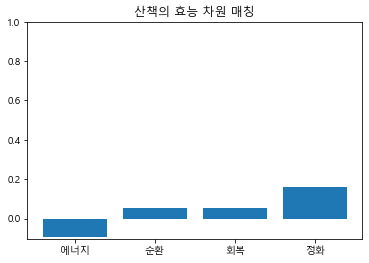

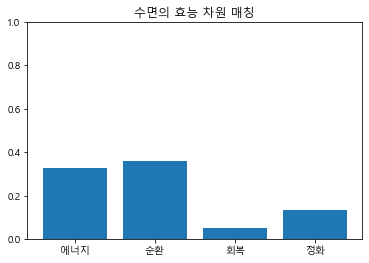

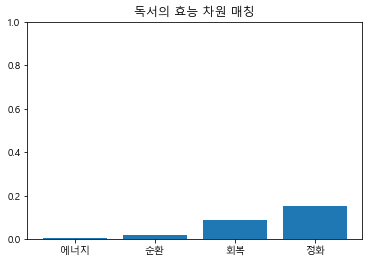

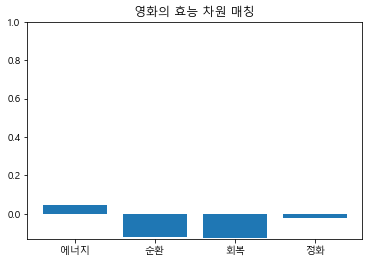

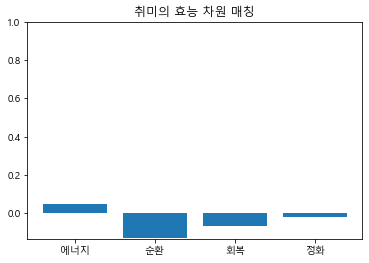

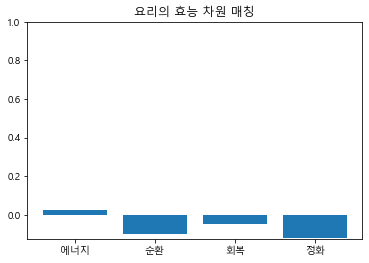

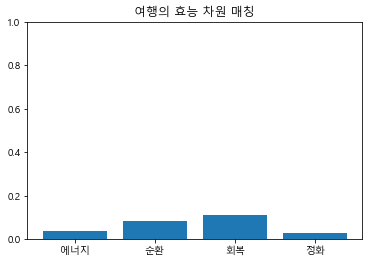

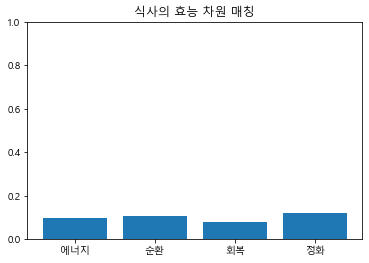

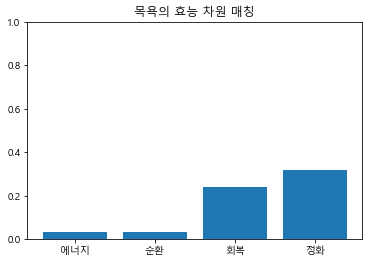

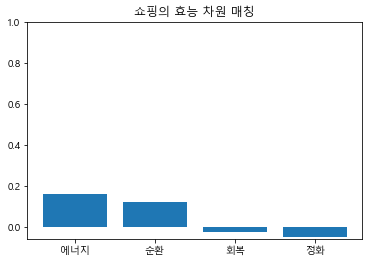

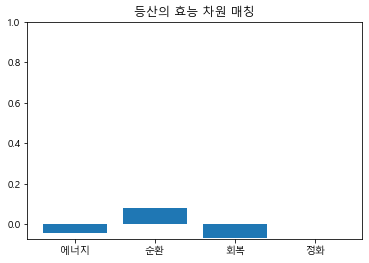

In [32]:
# word2vec을 이용해서 유사도 비교를 했을 때 너무 이상함
for act in actions:
    show(result(act),act)

In [31]:
for act in actions:
    print(result(act))

[0.078183815, 0.12828936, 0.10918332, 0.29912308]
[0.191724, 0.20181361, 0.20884648, 0.14776778]
[-0.09286627, 0.05454859, 0.052856974, 0.1589599]
[0.32890937, 0.36091477, 0.05248934, 0.1342397]
[0.006627108, 0.019030437, 0.08763137, 0.15496281]
[0.046389163, -0.11942139, -0.1246168, -0.022394873]
[0.05154026, -0.12575193, -0.063665, -0.016335186]
[0.02705744, -0.09854706, -0.04930831, -0.119735464]
[0.03654363, 0.085769415, 0.10924925, 0.03033192]
[0.09979421, 0.10641238, 0.08093266, 0.11924867]
[0.032883592, 0.033557203, 0.23882866, 0.31622288]
[0.15841478, 0.12042464, -0.025574228, -0.05092643]
[-0.044333108, 0.083119825, -0.06537355, 0.0011804514]
